In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("questions.csv")
df.head(30)

,question_id,chapter,difficulty,concept,content
0,fc084299-5fff-4543-b5f6-5a7971b93da6,chuong-3,0.83,office,Phát biểu nào sau đây là SAI khi nói về PowerP...
1,a6d25890-eecd-488a-8b89-2455786b3b80,chuong-3,0.40,office,"Khi thiết kế bản trình chiếu, nếu muốn tạo một..."
2,3d9980e3-3d1c-4932-920e-f94a57340888,chuong-3,0.75,ppt,"Khi làm việc với PowerPoint, để loại bỏ hiệu ứ..."
3,21b80886-9511-4cd4-bde3-1cf1878f21a2,chuong-3,0.56,office,"Trong Microsoft PowerPoint, để hiển thị các sl..."
4,239c4195-884a-49ea-80ea-45e18acbe1d4,chuong-3,0.49,office,"Trong Microsoft PowerPoint (2013, 2016, 2019),..."
5,14ef74f3-2867-478b-a59f-8ae6bc9bc1d9,chuong-3,0.68,chen-doi-tuong,Để tạo biểu đồ thể hiện phần trăm của các thàn...
6,58e6e75e-5897-4a53-bec4-3954176b2422,chuong-3,0.62,office,"Trong Excel, để in trang tính hiện tại, sau kh..."
7,7f84856b-856b-4afc-9419-10b532139567,chuong-3,0.31,cong-thuc-ham,Công thức nào dưới đây sẽ trả về giá trị TRUE ...
8,8184ec54-399c-4336-a303-aa0f7dc958b3,chuong-3,0.99,office,"Trong Microsoft PowerPoint (2013, 2016, 2019),..."
9,299a269d-11c9-4ff5-ab2a-d541d3b55f29,chuong-3,0.46,cong-thuc-ham,"Trong Microsoft Excel (2013, 2016, 2019), bạn ..."


In [3]:
# Step 1: Generate BERT embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight, efficient BERT model
text_features = model.encode(df['content'].tolist())

In [4]:
text_features.shape

(507, 384)

In [5]:
# One-hot encode 'chapter' and 'concept'
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[['chapter', 'concept']]).toarray()

# Scale numeric features
scaler = StandardScaler()
scaled_difficulty = scaler.fit_transform(df[['difficulty']])

In [6]:
combined_features = np.concatenate([text_features, encoded_categorical, scaled_difficulty], axis=1)
features = np.hstack([text_features, encoded_categorical, scaled_difficulty])

In [7]:
features.shape

(507, 420)

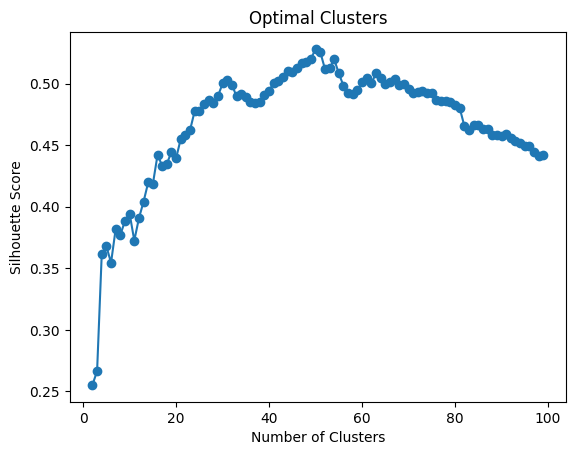

50

In [8]:
# Reduce dimensionality for visualization (optional)
pca = PCA(n_components=9)
reduced_features = pca.fit_transform(features)

# Test different numbers of clusters
max_score = -1
best_k = 2
scores = []
for k in range(2, 100):  # Test k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reduced_features)
    score = silhouette_score(reduced_features, labels)
    scores.append(score)
    if score > max_score:
        max_score = score
        best_k = k

# Plot Silhouette Scores
plt.plot(range(2, 100), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal Clusters')
plt.show()
best_k


In [9]:
best_k

50

In [10]:
# Using optimal number of clusters (e.g., based on the elbow or silhouette method)
optimal_k = 66
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(reduced_features)

# Save clustered data
df.to_csv('clustered_questions.csv', index=False)


In [11]:
# Create df with clusters only with reduced features and question_id
clustered_df = pd.DataFrame(reduced_features, columns=[f'feature_{i}' for i in range(reduced_features.shape[1])])
clustered_df['cluster'] = df['cluster']
clustered_df['question_id'] = df['question_id']
clustered_df.head() 

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,cluster,question_id
0,1.704391,-0.793905,-0.232004,0.290996,-0.432692,-0.413866,-0.402668,-0.098748,0.011418,31,fc084299-5fff-4543-b5f6-5a7971b93da6
1,-0.709078,-0.773988,-0.458009,-0.307962,-0.430098,-0.728601,-0.385163,-0.135594,-0.016513,29,a6d25890-eecd-488a-8b89-2455786b3b80
2,1.221922,-0.672054,-0.190961,0.203715,-0.149186,-0.087048,0.108231,-0.042313,0.059838,5,3d9980e3-3d1c-4932-920e-f94a57340888
3,0.206422,-0.861544,-0.422531,-0.115542,-0.423640,-0.603374,-0.453511,-0.090508,-0.001673,17,21b80886-9511-4cd4-bde3-1cf1878f21a2
4,-0.186364,-0.863699,-0.460131,-0.208149,-0.434195,-0.650058,-0.470172,-0.090778,0.005244,63,239c4195-884a-49ea-80ea-45e18acbe1d4


In [15]:
clustered_df[clustered_df['cluster'] == 31].head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,cluster,question_id
0,1.704391,-0.793905,-0.232004,0.290996,-0.432692,-0.413866,-0.402668,-0.098748,0.011418,31,fc084299-5fff-4543-b5f6-5a7971b93da6
36,1.717752,-0.859259,-0.260122,0.276166,-0.439438,-0.427466,-0.420992,-0.093434,-0.080982,31,409d90e8-757d-43b3-9931-d0d874be2cfe
44,2.050437,-0.871321,-0.233274,0.382095,-0.466285,-0.399353,-0.445915,-0.123146,-0.072684,31,83d97379-2a6a-43ef-a903-9fc82bc0a1b5
51,1.446203,-0.909850,-0.319389,0.208251,-0.461388,-0.488130,-0.534291,-0.114594,-0.057043,31,0a07fd72-4561-4115-991e-e887b9e9e427
82,1.597216,-0.866511,-0.282476,0.274331,-0.461765,-0.450559,-0.479698,-0.110234,-0.048233,31,f5485df8-0803-448f-a4b5-0d83e3632944


In [13]:
# get feature_vectors of each clusters from clustered_df and save it to a variable
features_vector = clustered_df[clustered_df['cluster'] == 32].iloc[:, :-2].values.tolist()
features_vector


[[-1.0673966839376374,
  -0.887832905427829,
  -0.5954374781966384,
  -0.6423591547552681,
  0.4502703693472974,
  0.3118858699713702,
  -0.03941063224769963,
  -0.022815468566666535,
  -0.03899189931222304],
 [-1.3346584108482733,
  -0.9452172643957102,
  -0.6734497516840199,
  -0.7858277179885144,
  0.5251672917459854,
  0.3647336199824079,
  -0.09364243960825909,
  -0.020295338837018895,
  -0.03011193768326514],
 [-0.880941678502623,
  -0.9659316018619792,
  -0.6425232108424233,
  -0.6777616902702351,
  0.5543783246399073,
  0.4217674792338813,
  -0.1384491184743848,
  -0.026341317524342135,
  0.005491164561379045],
 [-1.1050836625722937,
  -0.9806232331603191,
  -0.676398852697121,
  -0.7351448445955072,
  0.5437339176911861,
  0.38290098018060703,
  -0.20256883635963266,
  -0.05516089852350562,
  0.00868199314231512],
 [-1.2300930960115875,
  -0.8604156235634517,
  -0.5965670555196958,
  -0.6811873466104795,
  0.4344791853417291,
  0.2678765850102714,
  0.0330868428556325,
  -0.04

In [14]:
df

,question_id,chapter,difficulty,concept,content,cluster
0,fc084299-5fff-4543-b5f6-5a7971b93da6,chuong-3,0.83,office,Phát biểu nào sau đây là SAI khi nói về PowerP...,31
1,a6d25890-eecd-488a-8b89-2455786b3b80,chuong-3,0.40,office,"Khi thiết kế bản trình chiếu, nếu muốn tạo một...",29
2,3d9980e3-3d1c-4932-920e-f94a57340888,chuong-3,0.75,ppt,"Khi làm việc với PowerPoint, để loại bỏ hiệu ứ...",5
3,21b80886-9511-4cd4-bde3-1cf1878f21a2,chuong-3,0.56,office,"Trong Microsoft PowerPoint, để hiển thị các sl...",17
4,239c4195-884a-49ea-80ea-45e18acbe1d4,chuong-3,0.49,office,"Trong Microsoft PowerPoint (2013, 2016, 2019),...",63
...,...,...,...,...,...,...
502,1164b65d-1cba-8192-a242-e01d25e2bc9d,chuong-4,0.64,ham-nhap-xuat-du-lieu,Định dạng nào sau đây dùng để in ra một kí tự:,40
503,1164b65d-1cba-81dc-b305-d078f5e25994,chuong-4,0.55,ham-nhap-xuat-du-lieu,Định dạng nào sau đây dùng để in ra số thực vớ...,1
504,1164b65d-1cba-81dd-911a-c2546a76ad11,chuong-4,0.33,ham-nhap-xuat-du-lieu,Hàm nào trong Python để nhập một ký tự từ bàn ...,38
505,1164b65d-1cba-8165-93e4-c5ad83afc837,chuong-4,0.55,gioi-thieu-python,Python được Guido van Rossum phát triển dựa tr...,1
